In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

In [18]:
main_dir = os.path.abspath("../../data/ABIDE")
meta_csv_path = os.path.join(main_dir, "meta.csv")
X_path = os.path.join(main_dir, "harmonized_X.npy")

In [19]:
meta_df = pd.read_csv(meta_csv_path)
X = np.load(X_path)
X.shape

(823, 264, 264)

In [20]:
def corr_mx_flatten(X):
    upper_triangular_idx = np.triu_indices(X.shape[1], 1)
    X_flattened = X[:, upper_triangular_idx[0], upper_triangular_idx[1]]
    return X_flattened

In [21]:
X_flattened = corr_mx_flatten(X)
X_flattened.shape

(823, 34716)

In [22]:
N = 3
pca = PCA(n_components=N, random_state=0)
X_pca = pca.fit_transform(X_flattened)

In [23]:
pca.explained_variance_ratio_

array([0.02163425, 0.0209585 , 0.01387813])

In [24]:
pca_cols = ["PCA{}".format(i) for i in range(1, N + 1)]
pca_df = pd.DataFrame(X_pca, columns=pca_cols)
pca_df["SUB_ID"] = meta_df["SUB_ID"]
pca_df["SITE_ID"] = meta_df["SITE_ID"]
pca_df["DX_GROUP"] = meta_df["DX_GROUP"]
pca_df["AGE_AT_SCAN"] = meta_df["AGE_AT_SCAN"]
pca_df["SEX"] = meta_df["SEX"]
pca_df.to_csv(os.path.join(main_dir, "harmonized_PCA.csv"))

In [25]:
sorted_PCA = pca_df.groupby("SITE_ID").agg(["mean", "std"])[pca_cols] \
    .sort_values([(i, "mean") for i in pca_cols])
sorted_PCA

PCA1                PCA2                PCA3          
              mean       std      mean       std      mean       std
SITE_ID                                                             
KKI      -1.008185  3.273293 -0.605760  3.382232  0.879080  3.982632
STANFORD -0.856621  3.943169  0.200075  3.979087 -0.028263  2.882537
UM_1     -0.848775  4.613110 -0.038398  4.202404  0.188164  4.082838
UM_2     -0.761888  4.717873  0.807931  4.236734 -0.085979  3.172143
OHSU     -0.663634  4.007480 -1.638862  3.750767  0.651517  3.073783
NYU      -0.285419  4.861998 -0.071891  4.389113 -0.127030  3.822391
UCLA_2   -0.206932  3.623157 -1.781931  4.024222  0.333830  4.635268
TRINITY  -0.147166  3.244791 -0.147997  3.854826 -0.126191  5.112841
USM      -0.145428  4.863834  1.342743  5.119256  0.508864  4.193685
OLIN     -0.118912  4.837186 -0.610097  5.751312  0.622650  3.951969
SDSU      0.148169  6.451260 -0.450321  7.308950 -0.390526  3.344906
UCLA_1    0.443734  5.388830 -0.788484  4.970810 -0.041041  2.978979
YALE      0.503862  6.272048 -1.507213  5.313601  0.889834  4.435301
MAX_MUN   0.541668  5.470281  1.335184  4.948793 -0.468243  4.937895
PITT      0.624742  4.871169  0.716337  4.577834 -0.331947  3.636262
LEUVEN_2  0.790783  6.353171 -0.902044  6.109695 -0.705193  4.241881
SBL       0.825412  3.357482  1.770333  4.728300 -1.893777  4.123628
CALTECH   0.905223  5.095013  1.623214  4.450826 -0.831240  3.759717
LEUVEN_1  1.614852  6.064353  0.125920  6.868338 -0.225408  3.683805
CMU       1.647713  2.988813  0.413355  5.987437  1.056045  4.808190

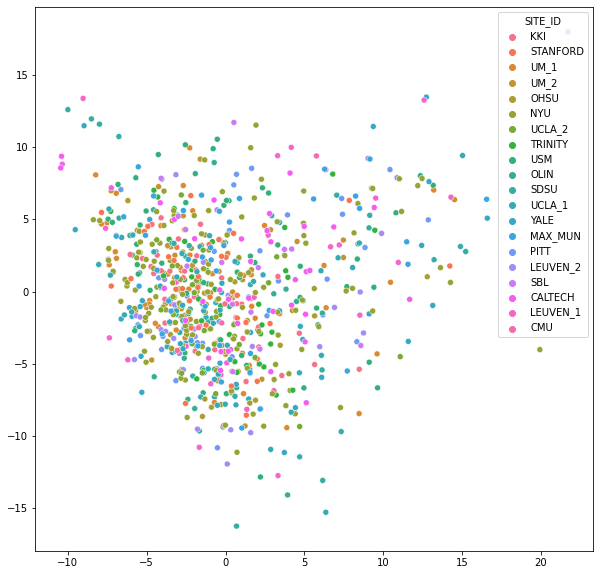

In [26]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sb.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], 
    hue=pca_df["SITE_ID"].values, 
    hue_order=sorted_PCA.index.values
)
plt.legend(title="SITE_ID")
plt.show()

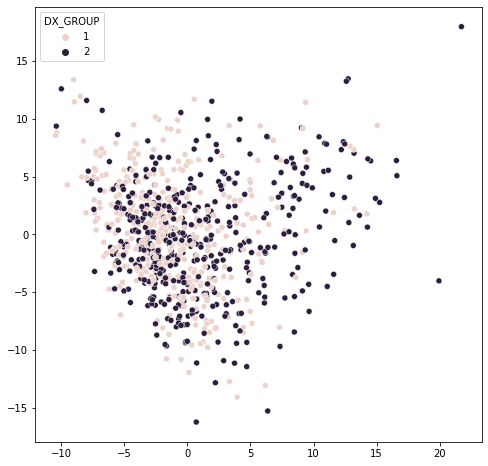

In [27]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pca_df["DX_GROUP"].values)
plt.legend(title="DX_GROUP")
plt.show()

In [28]:
ica = FastICA(n_components=N, random_state=0)
X_ica = ica.fit_transform(X_flattened)

In [29]:
ica_cols = ["ICA{}".format(i) for i in range(1, N + 1)]
ica_df = pd.DataFrame(X_ica, columns=ica_cols)
ica_df["SUB_ID"] = meta_df["SUB_ID"]
ica_df["SITE_ID"] = meta_df["SITE_ID"]
ica_df["DX_GROUP"] = meta_df["DX_GROUP"]
ica_df["AGE_AT_SCAN"] = meta_df["AGE_AT_SCAN"]
ica_df["SEX"] = meta_df["SEX"]
ica_df.to_csv(os.path.join(main_dir, "harmonized_ICA.csv"))

In [30]:
sorted_ICA = ica_df.groupby("SITE_ID").agg(["mean", "std"])[ica_cols] \
    .sort_values([(i, "mean") for i in ica_cols])
sorted_ICA

ICA1                ICA2                ICA3          
              mean       std      mean       std      mean       std
SITE_ID                                                             
SBL      -0.020013  0.032716 -0.007532  0.020582  0.004463  0.039464
CALTECH  -0.010761  0.029230 -0.009459  0.032433  0.005133  0.039048
MAX_MUN  -0.006909  0.041647 -0.006938  0.042834  0.005322  0.033249
LEUVEN_2 -0.004663  0.031627 -0.000489  0.056237 -0.009507  0.034641
PITT     -0.004581  0.033842 -0.005609  0.037644  0.001521  0.027304
LEUVEN_1 -0.003090  0.032021 -0.009839  0.051597 -0.005405  0.040730
SDSU     -0.002507  0.027566  0.001326  0.041383 -0.003930  0.057044
UM_2     -0.001875  0.027764  0.002072  0.033864  0.007461  0.030233
NYU      -0.000771  0.034362  0.002210  0.034019  0.000365  0.031409
TRINITY  -0.000696  0.045953  0.001624  0.022877 -0.000588  0.026561
STANFORD -0.000134  0.025850  0.004590  0.025901  0.004225  0.030161
UCLA_1    0.000949  0.027146  0.000029  0.037182 -0.006425  0.036186
USM       0.001757  0.039125 -0.004564  0.031324  0.009522  0.037485
UM_1      0.002161  0.034265  0.004951  0.025573  0.003130  0.038160
UCLA_2    0.006449  0.040284  0.006651  0.020011 -0.009455  0.033941
OLIN      0.006543  0.035255  0.001644  0.037460 -0.002183  0.038206
CMU       0.007181  0.042431 -0.013341  0.036826 -0.001560  0.030891
OHSU      0.009127  0.028647  0.008369  0.024712 -0.006404  0.028987
KKI       0.009225  0.035796  0.006572  0.014780  0.001469  0.029486
YALE      0.010213  0.040724  0.000388  0.043484 -0.009370  0.037704

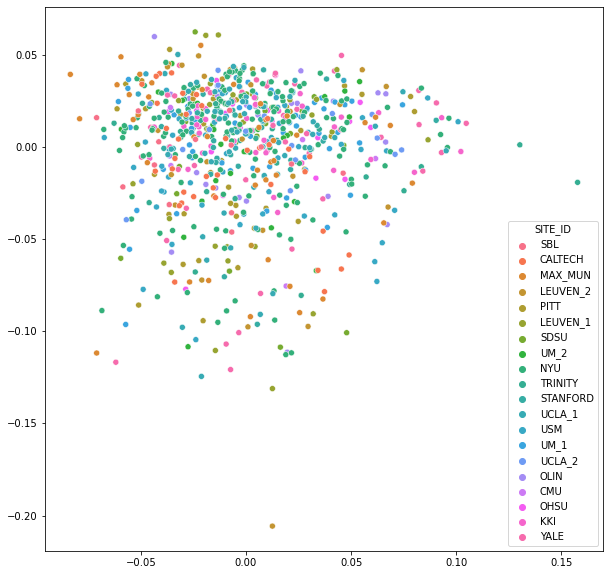

In [31]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sb.scatterplot(
    x=X_ica[:, 0], y=X_ica[:, 1], 
    hue=ica_df["SITE_ID"].values, 
    hue_order=sorted_ICA.index.values
)
plt.legend(title="SITE_ID")
plt.show()

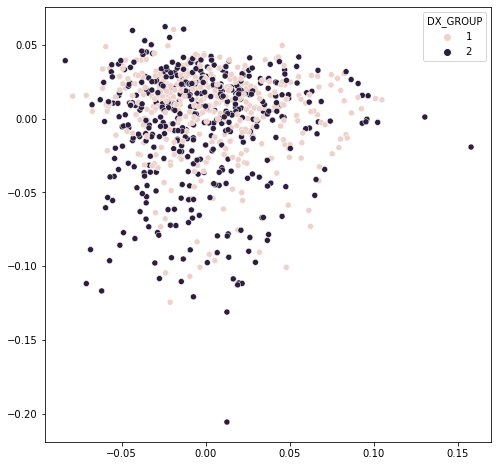

In [32]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sb.scatterplot(x=X_ica[:, 0], y=X_ica[:, 1], hue=ica_df["DX_GROUP"].values)
plt.legend(title="DX_GROUP")
plt.show()